In [2]:
#%run "../scripts/utility_readblt_fake.py" "fake3mu"

In [1]:
from utility_common import *
from utility_plotter import *
from utility_templatefitter_singlehist import *

import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline

#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

Welcome to JupyROOT 6.13/02


In [2]:
#cuts = 'lepton3_iso <0.15 & lepton3_pt > 30 & trilepton_mass>175 & nBJets == 0'
cuts = 'lepton3_pt > 0'# & lepton3_iso <0.15'

In [3]:
# fakeeemu
pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/fake/fake3mu/"

Data = LoadDataframe(pickledir + "data2016").query(cuts)
MCzw = LoadDataframe(pickledir + "mcwz3lnu").query(cuts)
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCttv = LoadDataframe(pickledir + "mcttboson").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)

In [4]:
# fake3mu
pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/fake/fakeeemu/"

Data = pd.concat([Data,LoadDataframe(pickledir + "data2016").query(cuts)],ignore_index=True)
MCzw = pd.concat([MCzw,LoadDataframe(pickledir + "mcwz3lnu").query(cuts)],ignore_index=True)
MCzz = pd.concat([MCzz,LoadDataframe(pickledir + "mcdiboson").query(cuts)],ignore_index=True)
MCdy = pd.concat([MCdy,LoadDataframe(pickledir + "mcdy").query(cuts)],ignore_index=True)
MCttv = pd.concat([MCttv,LoadDataframe(pickledir + "mcttboson").query(cuts)],ignore_index=True)
MCt  = pd.concat([MCt,LoadDataframe(pickledir + "mct").query(cuts)],ignore_index=True)
MCtt = pd.concat([MCtt,LoadDataframe(pickledir + "mctt").query(cuts)],ignore_index=True)

In [5]:
MCfake = pd.concat([MCtt,MCt,MCttv,MCdy,MCzz],ignore_index=True)
MCbg = pd.concat([MCzw],ignore_index=True)

In [6]:
Data2 = Data.query('lepton3_iso < 0.15')
MCbg2   = MCbg.query('lepton3_iso < 0.15')
MCfake2 = MCfake.query('lepton3_iso < 0.15')

In [7]:
df_list = [MCbg,MCfake,Data]
label_list = ["prompt",'nonprompt','data']
color_list = ['c','purple','k']

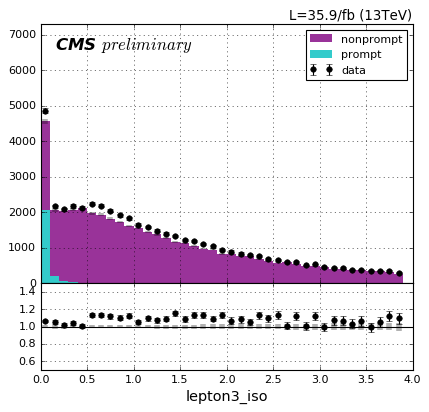

In [54]:
v,a,b,step,xl = "lepton3_iso",0,4,0.1,"lepton3_iso"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[1.0,1,1,1,1.0,1])
plotter.settingPlot(xl,label_list,color_list,logscale=False,plotWithoutXsErr=True)
plotter.makePlot("../plot/{}.png".format(v))

total cost is  38.990171
adjust 0 is  1.027 +/-  0.034
adjust 1 is  1.087 +/-  0.005


/home/zchen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


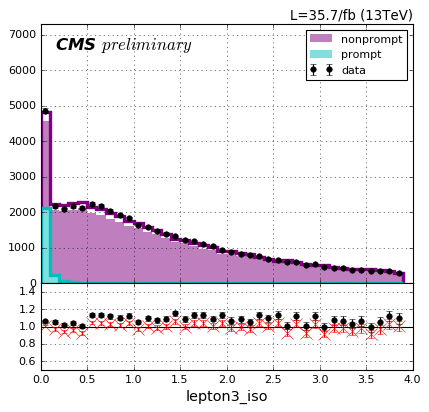

In [55]:
tfit = TemplateFitter_Hist(v,a,b,step,df_list,
                           lock=np.array([0,0]))
tfit.settingPlot(xl,label_list,color_list )
tfit.plotFittingResult()

plt.savefig("../plot/test.png")

In [36]:
bgnormal,sig_bgnormal = 1.081,0.026
sgnormal,sig_sgnormal = 1.066,0.017

mybins = [10,12.5,15,17.5,20,30,50,70]
mycent = [11.25,13.75,16.25,18.75,25,40,60]
#mybins = np.arange(10,55,5)
#mycent = np.arange(10,50,5)+2.5

In [37]:
def binwidth(arr,mybins):
    binwidth = np.ones_like(arr) 
    for i in range(len(mybins)-1):
        left = mybins[i]
        right = mybins[i+1]
        width = right-left
        slt = (arr>=left) & (arr<right)
        binwidth[slt] = width
    return binwidth

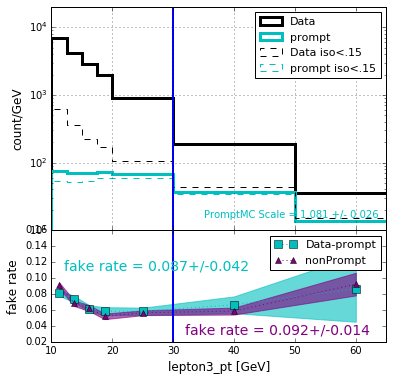

In [38]:
plt.rc("figure",facecolor="w")
fig, axes = plt.subplots(2, 1, sharex=True, 
                         gridspec_kw={'height_ratios':[2,1]},
                         figsize=(6,6))
fig.subplots_adjust(hspace=0)

ax = axes[0]      
data  = ax.hist(Data.lepton3_pt, bins=mybins, weights=Data.eventWeight/binwidth(Data.lepton3_pt,mybins), 
                histtype="step",linestyle='-', color='k',lw=3, label='Data')
mcbg  = ax.hist(MCbg.lepton3_pt, bins=mybins, weights=MCbg.eventWeight*bgnormal/binwidth(MCbg.lepton3_pt,mybins), 
                histtype="step",linestyle='-', color='c',lw=3, alpha= 1, label='prompt')


data2 = ax.hist(Data2.lepton3_pt, bins=mybins, weights=Data2.eventWeight/binwidth(Data2.lepton3_pt,mybins), 
                histtype="step",linestyle='--', color='k',lw=1, label='Data iso<.15')
mcbg2 = ax.hist(MCbg2.lepton3_pt, bins=mybins, weights=MCbg2.eventWeight*bgnormal/binwidth(MCbg2.lepton3_pt,mybins), 
                histtype="step",linestyle='--', color='c',lw=1, alpha= 1, label='prompt iso<.15')

ax.axvline(30,linestyle="-",color='b',lw=2)

ax.text(35,15,"PromptMC Scale = {:5.3f} +/- {:5.3f}".format(bgnormal,sig_bgnormal),color="c")


ax.set_ylabel("count/GeV",fontsize=12)
ax.set_yscale('log')
ax.set_ylim(10,2e4)
ax.grid(True)
ax.legend(fontsize=11)

data  = ax.hist(Data.lepton3_pt, bins=mybins, weights=Data.eventWeight,alpha=0)
mcbg  = ax.hist(MCbg.lepton3_pt, bins=mybins, weights=MCbg.eventWeight*bgnormal,alpha=0)
data2 = ax.hist(Data2.lepton3_pt, bins=mybins, weights=Data2.eventWeight,alpha=0)
mcbg2 = ax.hist(MCbg2.lepton3_pt, bins=mybins, weights=MCbg2.eventWeight*bgnormal,alpha=0)

ax = axes[1] 

# fake rate from data-bgMC
numerator = (data2[0]-mcbg2[0])
denominator = (data[0]-mcbg[0])

var_numerator = np.histogram(Data2.lepton3_pt, bins=mybins, weights=Data2.eventWeight**2)[0]
var_numerator += np.histogram(MCbg2.lepton3_pt, bins=mybins, weights=(MCbg2.eventWeight*bgnormal)**2)[0]
var_numerator += (sig_bgnormal/bgnormal*numerator)**2
var_denominator =  np.histogram(Data.lepton3_pt, bins=mybins, weights=Data.eventWeight**2)[0] 
var_denominator += np.histogram(MCbg.lepton3_pt, bins=mybins, weights=(MCbg.eventWeight*bgnormal)**2 )[0]
var_denominator += (sig_bgnormal/bgnormal*denominator)**2
fakerate = numerator/denominator

std_fakerate = fakerate*(var_numerator/numerator**2+var_denominator/denominator**2 )**0.5

ax.fill_between(mycent,fakerate-std_fakerate,fakerate+std_fakerate, color = 'c',alpha=0.6)
ax.plot(mycent,fakerate,"s:", color="c",markersize=8,label='Data-prompt')
ax.text(12,0.11,"fake rate = {:5.3f}+/-{:5.3f}".format(fakerate[-1],std_fakerate[-1]),
        fontsize=14, color = 'c')



# plot non-prompt MC
numerator = np.histogram(MCfake2.lepton3_pt,bins=mybins, weights=MCfake2.eventWeight)[0]
denominator = np.histogram(MCfake.lepton3_pt,bins=mybins, weights=MCfake.eventWeight )[0]

var_numerator = np.histogram(MCfake2.lepton3_pt, bins=mybins, weights=MCfake2.eventWeight**2)[0]
var_numerator += (sig_sgnormal/sgnormal*numerator)**2
var_denominator =  np.histogram(MCfake.lepton3_pt, bins=mybins, weights=MCfake.eventWeight**2)[0] 
var_denominator += (sig_sgnormal/sgnormal*denominator)**2
fakerate = numerator/denominator
std_fakerate = fakerate*(var_numerator/numerator**2 + var_denominator/denominator**2 )**0.5

ax.fill_between(mycent,fakerate-std_fakerate,fakerate+std_fakerate, color = 'purple',alpha=0.6)
ax.plot(mycent,fakerate,"^:", color="purple",label='nonPrompt')

ax.text(32,0.03,"fake rate = {:5.3f}+/-{:5.3f}".format(fakerate[-1],std_fakerate[-1]),
        fontsize=14, color = 'purple')


# plot current value
#ax.axhline(0.0566,linestyle="-",color='k',lw=2,label='current est')
ax.axvline(30,linestyle="-",color='b',lw=2)


# setting
ax.legend(fontsize=11,loc="upper right")
ax.set_ylim(0.02,0.16)
ax.set_xlim(10,65)

ax.set_ylabel("fake rate",fontsize=12)
ax.set_xlabel("lepton3_pt [GeV]",fontsize=12)

plt.savefig("fakerate.png",dpi=300)

(array([ 93107.,  66467.,  50734.,  40915., 101809., 120697.]),
 array([10. , 12.5, 15. , 17.5, 20. , 30. , 65. ]),
 <a list of 1 Patch objects>)

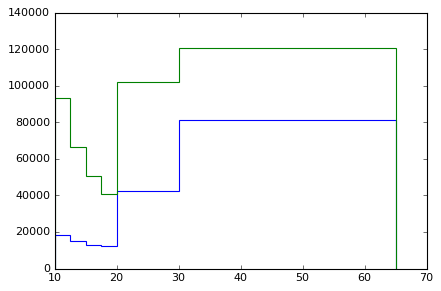

In [30]:
plt.hist(MCfake2.lepton3_pt,bins=mybins,histtype="step" )
plt.hist(MCfake.lepton3_pt,bins=mybins,histtype="step" )

In [13]:
df_list = [ MCzw,MCt,MCtt, MCttv, MCdy, MCzz, Data]
label_list = ['ZW','tW','ttbar','ttV','V+Jets', 'VV', 'data']
color_list = ["grey","#a32020", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple", "k"]

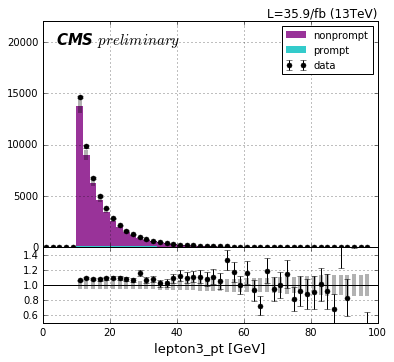

In [12]:
v,a,b,step,xl = "lepton3_pt",0,100,2,"lepton3_pt [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[1,1,1,1,1,1,1])
plotter.settingPlot(xl,label_list,color_list,logscale=False)
plotter.makePlot()

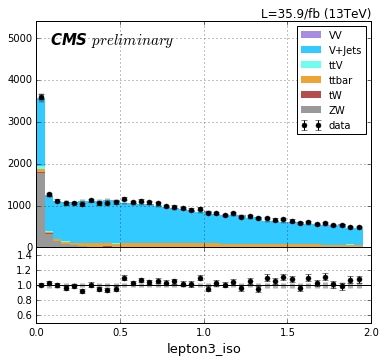

In [14]:
v,a,b,step,xl = "lepton3_iso",0,2,0.05,"lepton3_iso"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[1.03,1,1,1,1.08,1])
plotter.settingPlot(xl,label_list,color_list,logscale=False)
plotter.makePlot("../plot/fakeVVNormalization.png")

In [74]:
control = 'lepton3_iso <0.15  & trilepton_mass>175 & nBJets == 0'
Data3 = Data.query(control)
MCbg3   = MCbg.query(control)
MCfake3 = MCfake.query(control)
(np.sum(Data3.eventWeight) - np.sum(MCfake3.eventWeight))/np.sum(MCbg3.eventWeight)

1.1517747803715497

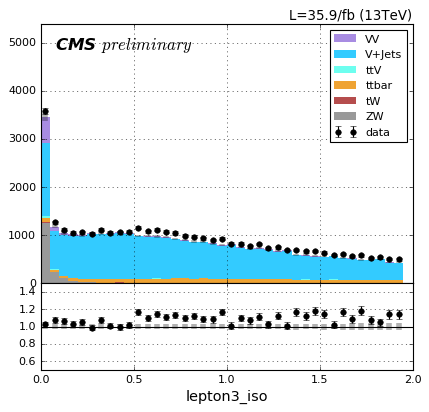

In [45]:
v,a,b,step,xl = "lepton3_iso",0,2,0.05,"lepton3_iso"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[1,1,1,1,1,1.15])
plotter.settingPlot(xl,label_list,color_list,logscale=False)
plotter.makePlot()